<a href="https://colab.research.google.com/github/Nadeem786087/slp-mlp-comparison/blob/main/slp_mlp_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Single-Layer Perceptron (SLP) Implementation







In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Generate synthetic datasets
def generate_linear(n=100):
    X = np.random.rand(n, 2)
    y = np.where(X[:, 0] + X[:, 1] > 1, 1, 0)   # linear boundary
    return X, y

In [ ]:
def generate_non_linear(n=200):
    X = np.random.rand(n, 2)
    y = np.where((X[:, 0]-0.5)**2 + (X[:, 1]-0.5)**2 < 0.1, 1, 0)  # circle
    return X, y

In [ ]:
# 2. Activation functions
def step(z):
    return np.where(z >= 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# ---------- 3. Perceptron class ----------
class SingleLayerPerceptron:
    def __init__(self, lr=0.1, epochs=100, activation='step', seed=42):
        np.random.seed(seed)
        self.lr = lr
        self.epochs = epochs
        self.activation = activation

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.random.randn(n_features)
        self.b = np.random.randn()
        self.acc_history = []
        for epoch in range(self.epochs):
            # Compute predictions
            z = np.dot(X, self.w) + self.b

            if self.activation == 'sigmoid':
                y_pred_prob = sigmoid(z)
                y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
            else:
                y_pred = step(z)

            # Update weights (perceptron learning rule)
            for xi, target, pred in zip(X, y, y_pred):
                update = self.lr * (target - pred)
                self.w += update * xi
                self.b += update

            # Compute accuracy per epoch
            y_hat = self.predict(X)
            acc = np.mean(y_hat == y)
            self.acc_history.append(acc)

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        if self.activation == 'sigmoid':
            y_pred_prob = sigmoid(z)
            return np.where(y_pred_prob >= 0.5, 1, 0)
        else:
            return step(z)


In [ ]:
# ---------- 4. Plotting functions ----------
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.tight_layout()

def plot_accuracy(model, title):
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, len(model.acc_history) + 1),
             model.acc_history, marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()

Exp 1: lr=0.01 epochs=50 act=step Final Accuracy=0.990
Exp 2: lr=0.1 epochs=100 act=sigmoid Final Accuracy=1.000
Exp 3: lr=0.5 epochs=200 act=step Final Accuracy=1.000


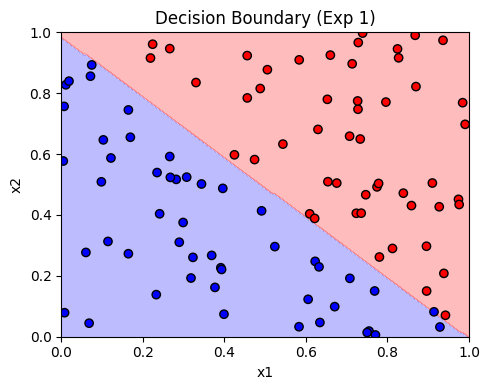

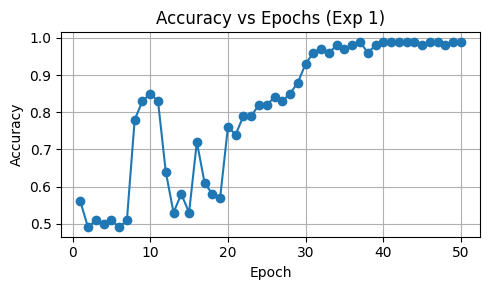

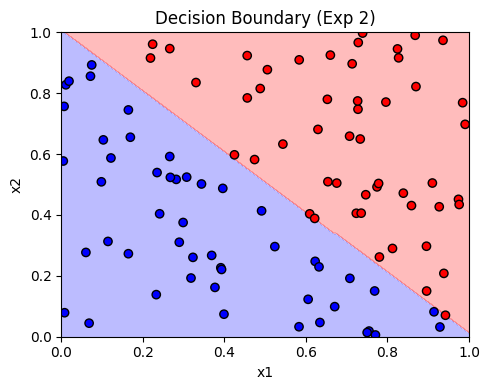

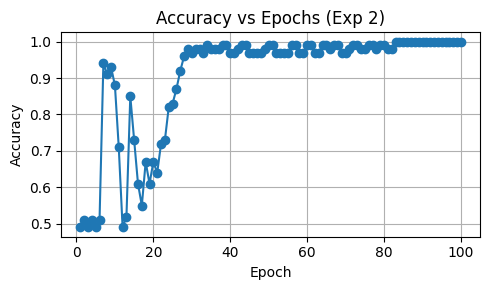

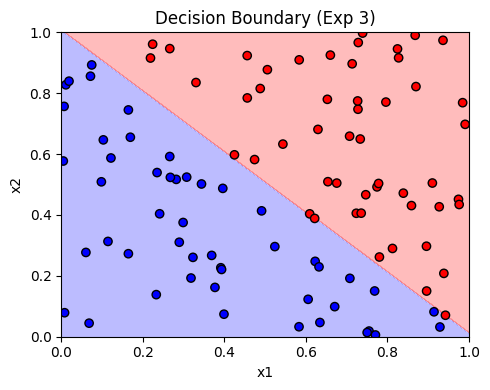

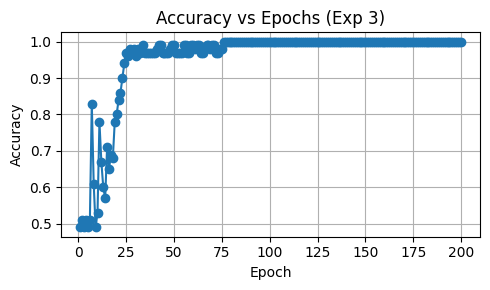

In [ ]:
# ---------- 5. Run experiments ----------
if __name__ == "__main__":
    # Choose dataset: uncomment one
    X, y = generate_linear()      # linear separable
    # X, y = generate_circular()  # non-linear circular

    experiments = [
        {"lr": 0.01, "epochs": 50,  "activation": "step"},
        {"lr": 0.1,  "epochs": 100, "activation": "sigmoid"},
        {"lr": 0.5,  "epochs": 200, "activation": "step"},
    ]

    for i, exp in enumerate(experiments, start=1):
        model = SingleLayerPerceptron(
            lr=exp["lr"],
            epochs=exp["epochs"],
            activation=exp["activation"]
        )
        model.fit(X, y)
        acc_final = model.acc_history[-1]
        print(f"Exp {i}: lr={exp['lr']} epochs={exp['epochs']} "
              f"act={exp['activation']} Final Accuracy={acc_final:.3f}")

        plot_decision_boundary(model, X, y,
                               f"Decision Boundary (Exp {i})")
        plot_accuracy(model,
                      f"Accuracy vs Epochs (Exp {i})")

    plt.show()


# Part-2: Multi-Layer Perceptron (MLP) Implementation



In [ ]:
# Part 2: Multi-Layer Perceptron (MLP)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


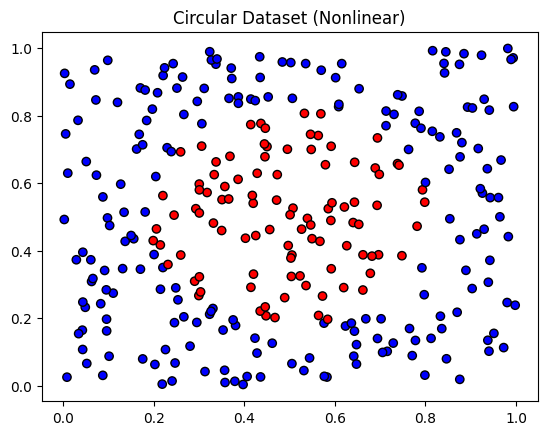

In [ ]:
def generate_linear(n=200, seed=1):
    np.random.seed(seed)
    X = np.random.rand(n, 2)
    y = np.where(X[:,0] + X[:,1] > 1, 1, 0)
    return X, y

def generate_circular(n=300, seed=2):
    np.random.seed(seed)
    X = np.random.rand(n, 2)
    y = np.where((X[:,0]-0.5)**2 + (X[:,1]-0.5)**2 < 0.1, 1, 0)
    return X, y

# Choose dataset
X, y = generate_circular()   # nonlinear problem (try linear later)
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
plt.title("Circular Dataset (Nonlinear)")
plt.show()


In [ ]:
def plot_decision_boundary(model, X, y, title):
    xx, yy = np.meshgrid(np.linspace(0,1,300), np.linspace(0,1,300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='bwr', s=30)
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.tight_layout()
    plt.show()


In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(8,4),    # two hidden layers
    activation='relu',           # try: 'relu', 'tanh', 'logistic'
    solver='adam',               # optimizer
    learning_rate_init=0.01,     # try: 0.001, 0.01, 0.1
    max_iter=200,                # number of epochs
    random_state=42,
    verbose=True                 # prints training progress
)

mlp.fit(X, y)
y_pred = mlp.predict(X)
acc = accuracy_score(y, y_pred)
print(f"Final Training Accuracy: {acc:.3f}")


Iteration 1, loss = 0.63831116
Iteration 2, loss = 0.63717186
Iteration 3, loss = 0.63636562
Iteration 4, loss = 0.63569269
Iteration 5, loss = 0.63491964
Iteration 6, loss = 0.63425700
Iteration 7, loss = 0.63390432
Iteration 8, loss = 0.63338344
Iteration 9, loss = 0.63302821
Iteration 10, loss = 0.63269855
Iteration 11, loss = 0.63255284
Iteration 12, loss = 0.63217505
Iteration 13, loss = 0.63220921
Iteration 14, loss = 0.63196002
Iteration 15, loss = 0.63197509
Iteration 16, loss = 0.63190817
Iteration 17, loss = 0.63185431
Iteration 18, loss = 0.63179660
Iteration 19, loss = 0.63183230
Iteration 20, loss = 0.63180343
Iteration 21, loss = 0.63178823
Iteration 22, loss = 0.63180615
Iteration 23, loss = 0.63180219
Iteration 24, loss = 0.63179890
Iteration 25, loss = 0.63179562
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Final Training Accuracy: 0.673


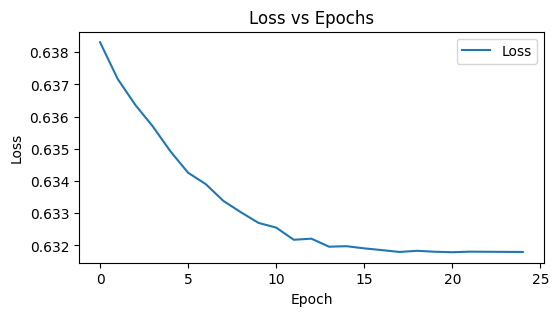

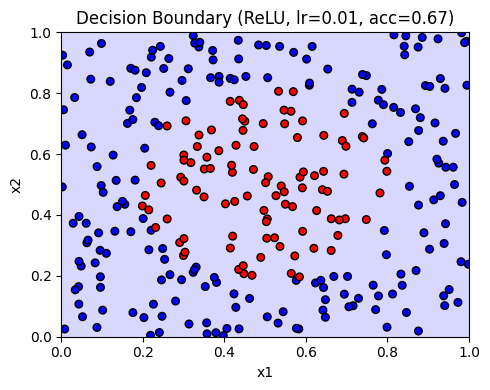

In [ ]:
# Plot loss and accuracy
plt.figure(figsize=(6,3))
plt.plot(mlp.loss_curve_, label='Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

plot_decision_boundary(mlp, X, y,
                       f"Decision Boundary (ReLU, lr=0.01, acc={acc:.2f})")


Activation=relu lr=0.01 acc=0.673


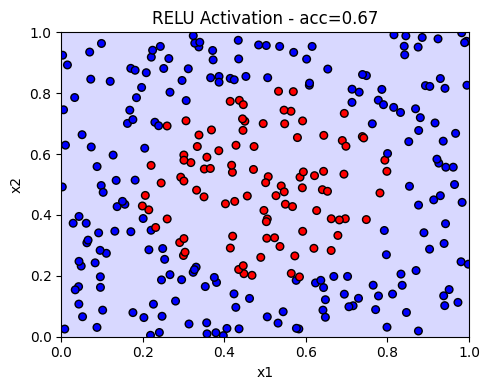

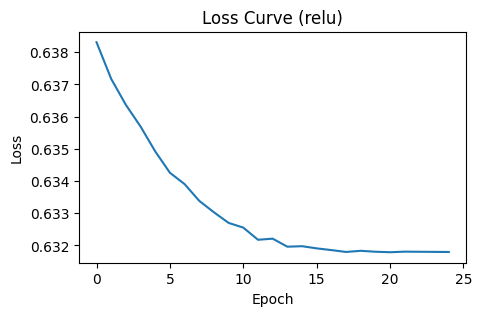

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation=tanh lr=0.01 acc=0.990


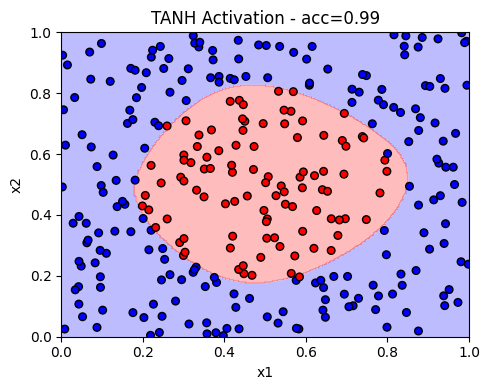

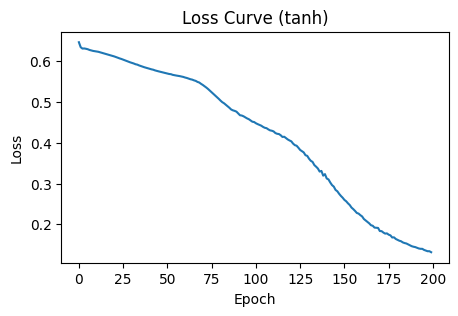

Activation=logistic lr=0.01 acc=0.673


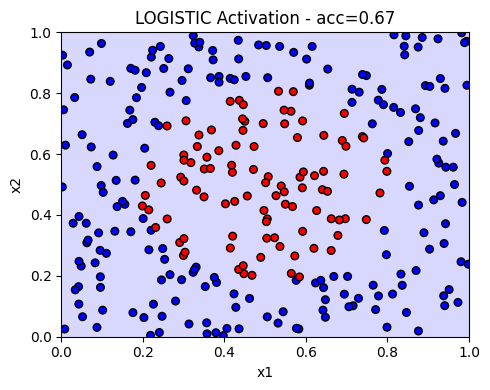

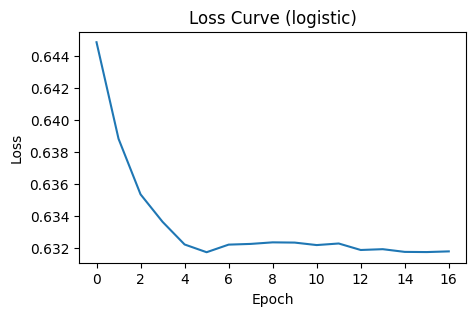

In [ ]:
experiments = [
    {'act':'relu',     'lr':0.01,  'hidden':(8,4), 'epochs':200},
    {'act':'tanh',     'lr':0.01,  'hidden':(8,4), 'epochs':200},
    {'act':'logistic', 'lr':0.01,  'hidden':(8,4), 'epochs':200},
]

for exp in experiments:
    mlp = MLPClassifier(
        hidden_layer_sizes=exp['hidden'],
        activation=exp['act'],
        solver='adam',
        learning_rate_init=exp['lr'],
        max_iter=exp['epochs'],
        random_state=42
    )
    mlp.fit(X, y)
    acc = accuracy_score(y, mlp.predict(X))
    print(f"Activation={exp['act']} lr={exp['lr']} acc={acc:.3f}")

    # Plot boundary & loss
    plot_decision_boundary(mlp, X, y,
        f"{exp['act'].upper()} Activation - acc={acc:.2f}")
    plt.figure(figsize=(5,3))
    plt.plot(mlp.loss_curve_)
    plt.title(f"Loss Curve ({exp['act']})")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.show()
